In [1]:
#Importer les packages nécessaires
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pylab as plt
import seaborn as sns
import pulp as p

# Partie 1: Sélection de notre portefeuille d'investissement

In [7]:
# Liste des tickers des actions du CAC 40
tickers_cac40 = ['AC.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'BN.PA', 'BNP.PA', 'CAP.PA', 'CS.PA', 'DG.PA', 'DSY.PA',
                 'EL.PA', 'EN.PA', 'ENGI.PA', 'ERF.PA', 'FGR.PA', 'GLE.PA', 'HO.PA', 'KER.PA', 'LR.PA','MC.PA', 
                 'ML.PA', 'OR.PA', 'ORA.PA', 'PUB.PA', 'RI.PA', 'RMS.PA', 'RNO.PA', 'SAF.PA','SAN.PA', 'SGO.PA', 
                 'SU.PA', 'TTE.PA', 'VIV.PA']

data_cac40 = yf.download(tickers_cac40, period='5y')['Adj Close']
data_cac40

[*********************100%%**********************]  33 of 33 completed


Ticker,AC.PA,AI.PA,AIR.PA,ALO.PA,BN.PA,BNP.PA,CAP.PA,CS.PA,DG.PA,DSY.PA,...,PUB.PA,RI.PA,RMS.PA,RNO.PA,SAF.PA,SAN.PA,SGO.PA,SU.PA,TTE.PA,VIV.PA
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-21,36.932529,87.513229,117.282578,33.802887,60.660912,33.130440,100.178673,18.139380,81.066071,26.523666,...,28.198133,142.146988,610.197327,46.879940,134.143326,68.422905,34.009445,74.643509,33.751781,8.197954
2019-10-22,36.144508,87.175339,117.147995,33.676315,61.300152,33.137371,98.606140,18.124332,80.765709,26.084049,...,28.741405,140.226044,613.686523,46.803535,135.163971,67.819664,33.710957,75.217140,34.263729,8.207824
2019-10-23,36.267937,87.851120,115.513733,33.576870,61.737534,33.230919,97.218628,18.158188,80.665581,26.074280,...,28.867924,140.717484,606.320618,46.784431,134.240540,67.737022,33.599583,75.432251,34.361752,8.188086
2019-10-24,36.666691,87.475693,117.532524,33.631115,62.259007,33.140835,98.929901,18.334995,82.033928,25.927740,...,28.800941,142.727722,618.144714,46.755779,135.309784,69.017891,33.367928,75.109589,34.492462,8.237432
2019-10-25,36.647701,87.700943,118.743805,34.173550,62.208546,33.047287,93.888596,18.286089,83.977982,26.211048,...,28.867924,142.325699,633.070312,46.827408,135.406982,68.918724,33.002621,75.163361,34.634064,8.184796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-15,40.930000,171.820007,135.759995,19.200001,65.599998,63.709999,182.050003,35.820000,106.300003,32.880001,...,98.480003,124.500000,2084.000000,39.180000,208.399994,100.660004,83.500000,240.149994,59.490002,10.270000
2024-10-16,41.730000,171.880005,135.960007,20.440001,65.419998,64.480003,182.100006,35.759998,107.250000,32.590000,...,98.699997,123.500000,2056.000000,39.950001,208.500000,100.379997,83.959999,238.699997,59.410000,10.400000
2024-10-17,41.990002,172.619995,141.300003,20.450001,65.139999,65.610001,182.850006,35.970001,107.250000,32.830002,...,101.500000,125.750000,2067.000000,40.419998,214.399994,101.019997,84.580002,247.449997,59.779999,10.580000


In [8]:
# Calcul des rendements journaliers
returns_cac40 = data_cac40.pct_change().dropna()
returns_cac40

Ticker,AC.PA,AI.PA,AIR.PA,ALO.PA,BN.PA,BNP.PA,CAP.PA,CS.PA,DG.PA,DSY.PA,...,PUB.PA,RI.PA,RMS.PA,RNO.PA,SAF.PA,SAN.PA,SGO.PA,SU.PA,TTE.PA,VIV.PA
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-22,-0.021337,-0.003861,-0.001148,-0.003744,0.010538,0.000209,-0.015697,-0.000830,-0.003705,-0.016575,...,0.019266,-0.013514,0.005718,-0.001630,0.007609,-0.008816,-0.008777,0.007685,0.015168,0.001204
2019-10-23,0.003415,0.007752,-0.013950,-0.002953,0.007135,0.002823,-0.014071,0.001868,-0.001240,-0.000375,...,0.004402,0.003505,-0.012003,-0.000408,-0.006832,-0.001219,-0.003304,0.002860,0.002861,-0.002405
2019-10-24,0.010995,-0.004273,0.017477,0.001616,0.008447,-0.002711,0.017602,0.009737,0.016963,-0.005620,...,-0.002320,0.014286,0.019501,-0.000612,0.007965,0.018909,-0.006895,-0.004278,0.003804,0.006027
2019-10-25,-0.000518,0.002575,0.010306,0.016129,-0.000810,-0.002823,-0.050958,-0.002667,0.023698,0.010927,...,0.002326,-0.002817,0.024146,0.001532,0.000718,-0.001437,-0.010948,0.000716,0.004105,-0.006390
2019-10-28,0.004145,0.004281,0.009391,0.016137,-0.003515,0.007129,0.001478,-0.001851,-0.013810,0.013791,...,-0.006961,-0.001256,-0.005205,0.013359,0.002154,-0.000240,-0.004860,0.013594,0.003250,0.011254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-15,0.007384,-0.001627,0.004737,-0.010054,0.007680,0.012556,-0.009252,0.012150,0.000471,-0.038034,...,-0.001824,-0.007177,-0.018370,-0.002800,-0.001916,-0.009057,0.004813,-0.014365,-0.048008,0.002440
2024-10-16,0.019546,0.000349,0.001473,0.064583,-0.002744,0.012086,0.000275,-0.001675,0.008937,-0.008820,...,0.002234,-0.008032,-0.013436,0.019653,0.000480,-0.002782,0.005509,-0.006038,-0.001345,0.012658
2024-10-17,0.006231,0.004305,0.039276,0.000489,-0.004280,0.017525,0.004119,0.005873,0.000000,0.007364,...,0.028369,0.018219,0.005350,0.011765,0.028297,0.006376,0.007385,0.036657,0.006228,0.017308


In [9]:
# Calcul des rendements moyens annuels
expected_returns = returns_cac40.mean() * 252  # Rendements espérés annuels (252 jours de bourse)
expected_returns

Ticker
AC.PA      0.092456
AI.PA      0.155396
AIR.PA     0.119873
ALO.PA    -0.006830
BN.PA      0.033299
BNP.PA     0.199045
CAP.PA     0.162808
CS.PA      0.171269
DG.PA      0.098344
DSY.PA     0.085746
EL.PA      0.149609
EN.PA      0.040295
ENGI.PA    0.108067
ERF.PA     0.114421
FGR.PA     0.059215
GLE.PA     0.106229
HO.PA      0.167104
KER.PA    -0.059847
LR.PA      0.140834
MC.PA      0.153706
ML.PA      0.120840
OR.PA      0.130286
ORA.PA     0.004031
PUB.PA     0.298618
RI.PA      0.002153
RMS.PA     0.278516
RNO.PA     0.081559
SAF.PA     0.170252
SAN.PA     0.101195
SGO.PA     0.232354
SU.PA      0.273086
TTE.PA     0.163907
VIV.PA     0.080389
dtype: float64

In [10]:
#calcul de la matrice de covariance
cov_matrix = returns_cac40.cov() * 252  # Matrice de covariance annuelle
cov_matrix

Ticker,AC.PA,AI.PA,AIR.PA,ALO.PA,BN.PA,BNP.PA,CAP.PA,CS.PA,DG.PA,DSY.PA,...,PUB.PA,RI.PA,RMS.PA,RNO.PA,SAF.PA,SAN.PA,SGO.PA,SU.PA,TTE.PA,VIV.PA
Ticker,,,,,,,,,,,,,,,,,,,,,
AC.PA,0.139884,0.030698,0.108026,0.053632,0.023110,0.085643,0.053414,0.063279,0.076767,0.029595,...,0.062479,0.034493,0.040279,0.105747,0.098302,0.015425,0.064488,0.053180,0.061738,0.035046
AI.PA,0.030698,0.045708,0.038665,0.032035,0.019158,0.035227,0.031722,0.031715,0.037224,0.027760,...,0.028978,0.021835,0.032521,0.037949,0.038548,0.017061,0.038211,0.038920,0.027809,0.020447
AIR.PA,0.108026,0.038665,0.173074,0.064292,0.027714,0.094423,0.062575,0.069412,0.087194,0.032596,...,0.062197,0.037256,0.049165,0.102796,0.135236,0.018002,0.074005,0.062468,0.069038,0.033643
ALO.PA,0.053632,0.032035,0.064292,0.174468,0.017399,0.062606,0.043255,0.045751,0.052760,0.025906,...,0.042166,0.027406,0.035332,0.079915,0.065611,0.013320,0.062398,0.051425,0.037690,0.033246
BN.PA,0.023110,0.019158,0.027714,0.017399,0.041587,0.026042,0.016822,0.021423,0.027160,0.010519,...,0.020814,0.019764,0.013853,0.028619,0.024262,0.017313,0.021366,0.019352,0.016073,0.015369
BNP.PA,0.085643,0.035227,0.094423,0.062606,0.026042,0.128604,0.051703,0.074166,0.076080,0.023980,...,0.065568,0.032256,0.037532,0.116839,0.089958,0.018632,0.075196,0.057269,0.070012,0.037520
CAP.PA,0.053414,0.031722,0.062575,0.043255,0.016822,0.051703,0.093499,0.044773,0.048180,0.052866,...,0.042622,0.029327,0.043580,0.058395,0.063244,0.014099,0.055656,0.051229,0.035805,0.026488
CS.PA,0.063279,0.031715,0.069412,0.045751,0.021423,0.074166,0.044773,0.076529,0.059836,0.025217,...,0.052364,0.025663,0.030785,0.081915,0.073152,0.018316,0.057746,0.046939,0.056510,0.029001
DG.PA,0.076767,0.037224,0.087194,0.052760,0.027160,0.076080,0.048180,0.059836,0.093355,0.027394,...,0.053424,0.031516,0.037545,0.084559,0.085112,0.020286,0.063637,0.051272,0.056480,0.029713


In [11]:
# Pour faire le meilleur choix d'investissement, nous avons pensé à le méthode de maximisation du ratio de sharpe
## Objectif de la maximisation :
### Notre objectif est de maximiser le ratio de Sharpe, qui mesure la performance ajustée au risque d'un portefeuille. 
### La maximisation de ce ratio permet de trouver la meilleure combinaison d'actifs, offrant le meilleur compromis entre risque (volatilité) et rendement attendu.

# Taux sans risque (on va prendre le taux sans risque du livret A qui est de 3%)
risk_free_rate = 0.03

# Fonction pour calculer le rendement du portefeuille
def portfolio_return(weights, expected_returns):
    return np.sum(weights * expected_returns)

# Fonction pour calculer le risque du portefeuille (écart-type)
def portfolio_risk(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Fonction pour calculer le ratio de Sharpe (objectif à maximiser)
def sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate):
    ret = portfolio_return(weights, expected_returns)
    risk = portfolio_risk(weights, cov_matrix)
    return (ret - risk_free_rate) / risk

# Fonction à minimiser (maximiser le Sharpe ratio -> minimiser son opposé)
def neg_sharpe_ratio(weights,expected_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate)


# Résoudre le problème d'optimisation
def optimize_sharpe_ratio(expected_returns, cov_matrix, risk_free_rate, tickers_cac40):
    num_actifs = len(tickers_cac40)
    poids_initiaux = num_actifs * [1 / num_actifs]  # initialiser le portefeuille à des poids initiaux égaux
    bornes = tuple((0, 1) for _ in range(num_actifs))  # Bornes pour chaque poids; on autorise pas la vente à découvert
    contrainte = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Somme des poids = 1
    
    # Optimisation
    opt_obj = minimize(neg_sharpe_ratio, poids_initiaux, args=(expected_returns, cov_matrix, risk_free_rate), 
                           method='SLSQP', bounds=bornes, constraints=contrainte)
    
    return opt_obj.x  # Poids optimaux

In [12]:
optimize_sharpe_ratio(expected_returns, cov_matrix, risk_free_rate, tickers_cac40)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.97564877e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.16027964e-16, 1.04465173e-16, 0.00000000e+00, 0.00000000e+00,
       5.41721466e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.12771851e-17, 0.00000000e+00, 7.55895409e-16, 3.17480204e-01,
       0.00000000e+00, 3.91210969e-01, 0.00000000e+00, 1.30350144e-16,
       7.58252975e-02, 0.00000000e+00, 1.61311382e-01, 0.00000000e+00,
       2.37600348e-16])

In [13]:
# Affichage des poids de chaque actif avec 4 chiffres après la virgule:
optimal_weights = optimize_sharpe_ratio(expected_returns, cov_matrix, risk_free_rate, tickers_cac40)
print("Poids optimaux du portefeuille :")
for ticker, poids in zip(tickers_cac40, optimal_weights):
    print(f"{ticker}: {poids:.4f}")
print('')
print(f"\nRendement attendu du portefeuille: {portfolio_return(optimal_weights, expected_returns):.4f}")
print(f"Risque du portefeuille (écart-type): {portfolio_risk(optimal_weights, cov_matrix):.4f}")
print(f"Ratio de Sharpe: {sharpe_ratio(optimal_weights, expected_returns, cov_matrix, risk_free_rate):.4f}")

Poids optimaux du portefeuille :
AC.PA: 0.0000
AI.PA: 0.0000
AIR.PA: 0.0000
ALO.PA: 0.0000
BN.PA: 0.0000
BNP.PA: 0.0000
CAP.PA: 0.0000
CS.PA: 0.0000
DG.PA: 0.0000
DSY.PA: 0.0000
EL.PA: 0.0000
EN.PA: 0.0000
ENGI.PA: 0.0000
ERF.PA: 0.0000
FGR.PA: 0.0000
GLE.PA: 0.0000
HO.PA: 0.0542
KER.PA: 0.0000
LR.PA: 0.0000
MC.PA: 0.0000
ML.PA: 0.0000
OR.PA: 0.0000
ORA.PA: 0.0000
PUB.PA: 0.3175
RI.PA: 0.0000
RMS.PA: 0.3912
RNO.PA: 0.0000
SAF.PA: 0.0000
SAN.PA: 0.0758
SGO.PA: 0.0000
SU.PA: 0.1613
TTE.PA: 0.0000
VIV.PA: 0.0000


Rendement attendu du portefeuille: 0.2645
Risque du portefeuille (écart-type): 0.2181
Ratio de Sharpe: 1.0755


Les actifs sélectionnés avec des poids non nuls sont:
HO.PA: 0.0542
PUB.PA: 0.3175
RMS.PA: 0.3912
SAN.PA: 0.0758
SU.PA: 0.1613

Matrice de corrélation des actifs sélectionnés:
Ticker     HO.PA    PUB.PA    RMS.PA    SAN.PA     SU.PA
Ticker                                                  
HO.PA   1.000000  0.373787  0.211353  0.202375  0.271020
PUB.PA  0.373787  1.000000  0.374949  0.159049  0.521488
RMS.PA  0.211353  0.374949  1.000000  0.131176  0.594214
SAN.PA  0.202375  0.159049  0.131176  1.000000  0.254286
SU.PA   0.271020  0.521488  0.594214  0.254286  1.000000

Notre portefeuille d'investissement est composé des actifs avec les caractéristiques suivantes:

         Actif  Rendement attendu  Volatilité  Allocation
Ticker                                                   
HO.PA    HO.PA             0.1671      0.3000      0.0542
PUB.PA  PUB.PA             0.2986      0.3138      0.3175
RMS.PA  RMS.PA             0.2785      0.2799      0.3912
SAN.PA  SAN.PA             0.1012    

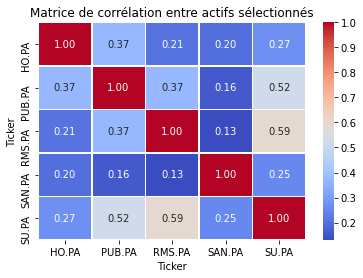

In [14]:
# Filtrer les actifs avec des poids non nuls
selected_assets = data_cac40.columns[optimal_weights > 0.0001].tolist()  #selectionne les colonnes qui répond à notre condition et la Convertit en liste
selected_weights = optimal_weights[optimal_weights > 0.0001]

# Vérifier que seuls les actifs avec des poids non nuls sont sélectionnés
print("Les actifs sélectionnés avec des poids non nuls sont:")
for ticker, weight in zip(selected_assets, selected_weights):
    print(f"{ticker}: {weight:.4f}")

# Sélectionner dans le tableau rendements_journaliers uniquement les colonnes correspondant aux actifs sélectionnés 
active_assets = returns_cac40[selected_assets]  # Sélectionner les rendements des actifs sélectionnés

# Calculer la matrice de corrélation pour les actifs sélectionnés
correlation_matrix = active_assets.corr()

# Afficher la matrice de corrélation
print("")
print("Matrice de corrélation des actifs sélectionnés:")
print(correlation_matrix)

#visualisation de la matrice de corrélation pour vérifier si les actifs obtenus par l'optimisation du ratio de sharpe sont faiblement corréles
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation entre actifs sélectionnés')

# Création d'un DataFrame pour afficher les rendements, la volatilité et l'allocation des actifs sélectionnés pour notre portefeuille
portfolio_summary = pd.DataFrame({
    'Actif': selected_assets,
    'Rendement attendu': expected_returns[selected_assets],
    'Volatilité': np.sqrt(np.diag(cov_matrix.loc[selected_assets, selected_assets])),
    'Allocation': selected_weights
}).round(4)
print("")
print("Notre portefeuille d'investissement est composé des actifs avec les caractéristiques suivantes:")
print("")
print(portfolio_summary)

Voici les entreprises associées aux tickers mentionnés et leur secteur d'activité :

1- Thales (HO.PA), secteur: Aéronautique et Défense.

2- Publicis Groupe (PUB.PA), secteur: Communication et Publicité.

3- Hermès International (RMS.PA), secteur: Luxe et Mode.

4- Sanofi (SAN.PA), secteur: Pharmaceutique.

5- Schneider Electric (SU.PA), secteur: Équipements Électriques et Automatisation. 

#  Partie 2: Optimisation de la VaR (Simulation par la méthode de loi normale)

In [15]:
#1- simulation des rendements des actifs sélectionnés par la loi normale
simulated_returns = np.random.normal(active_assets.mean(), active_assets.std(), (200, len(selected_assets)))
simulated_returns

array([[-8.76205297e-04, -1.32411199e-02,  1.50584513e-02,
         2.31421144e-04, -7.91873766e-03],
       [ 5.44333929e-03,  3.67453494e-03,  7.58579818e-03,
        -1.57421934e-02,  2.06775256e-02],
       [-1.08880829e-02,  1.59782715e-02,  1.13995050e-02,
         5.58196896e-02, -6.70784317e-03],
       [-3.70485460e-03,  3.10641935e-03,  2.47885756e-02,
        -2.95872866e-02,  1.75741606e-02],
       [-1.15486734e-03,  8.71054207e-03, -9.69337205e-03,
         2.85188823e-03,  9.08281924e-03],
       [ 2.09447876e-02,  2.43785914e-03,  8.00800837e-03,
        -2.84401857e-02, -2.64157493e-02],
       [ 1.49971874e-02,  2.91090354e-02,  1.36767447e-03,
        -9.12708161e-03, -3.76301882e-03],
       [-1.63149106e-02, -2.31841792e-02, -5.00826494e-03,
         5.41541872e-03,  3.74283418e-03],
       [-2.21632959e-02, -1.20018407e-02, -1.13187165e-02,
         5.59012215e-03, -4.23121326e-03],
       [-1.06587288e-02, -2.54617081e-02, -7.10926651e-03,
        -1.40559775e-02

In [16]:
# Résoudre le problème d'optimisation
def VaR_optimize(selected_assets, simulated_returns):
    
    #Constantes
    c=100  #une constante assez grande
    total_scenarios=200
    epsilon=0.05
    
    # 1- Initialiser le problème
    prob_opt = p.LpProblem("Minimized_VaR", p.LpMinimize)
    
    # 2- spécifier les variables de décision 
    w = [p.LpVariable(f'w_{i}', lowBound=0, upBound=1) for i in range(len(selected_assets))] # les poids (ps de vente à découvert)
    gamma = p.LpVariable('gamma') #le gamma (VaR)
    # Variables binaires y_n pour chaque scénario (1 si le scénario est une perte "mauvaise")
    y = [p.LpVariable(f'y_{n}', cat='Binary') for n in range(total_scenarios)]
    
    # 3- objective function: 
    prob_opt += gamma, "Minimized_VaR"
    
    # Contrainte 1 : la somme des poids doit être égale à 1 (somme des allocations)
    prob_opt += (p.lpSum(w) == 1)

    # Contrainte 2 pour les scénarios : - rendement du scénario <= gamma + C * y_n
    for n in range(total_scenarios):
        prob_opt += (-p.lpSum(simulated_returns[n][i] * w[i] for i in range(len(selected_assets))) <= gamma + c * y[n]) 

    # Contrainte 3 pour limiter le nombre de scénarios considérés comme "mauvais"
    prob_opt += sum(y) <= int(epsilon*total_scenarios)
    
    # 5- Résoudre le problème d'optimisation
    prob_opt.solve()
    
    # Extraire les résultats
    poids_optimaux = [p.value(w[i]) for i in range(len(selected_assets))]
    gamma_optimal = p.value(prob_opt.objective)
    
    # Afficher les résultats
    print("Poids optimaux :", poids_optimaux)
    print("VaR optimale :", gamma_optimal)
    
    return poids_optimaux, gamma_optimal


def affichage_optimal_weights(poids_optimaux, selected_assets):
    print("Poids optimaux pour chaque actif sélectionné :")
    for actif, poids in zip(selected_assets, poids_optimaux):
        print(f"{actif}: {poids:.4f}")

In [17]:
poids_optimaux, gamma_optimal = VaR_optimize(selected_assets, simulated_returns)
affichage_optimal_weights(poids_optimaux, selected_assets)
print(f"\nVaR optimale: {gamma_optimal:.4f}")

Poids optimaux : [0.20909347, 0.13930258, 0.15195465, 0.38946852, 0.11018078]
VaR optimale : 0.009061282
Poids optimaux pour chaque actif sélectionné :
HO.PA: 0.2091
PUB.PA: 0.1393
RMS.PA: 0.1520
SAN.PA: 0.3895
SU.PA: 0.1102

VaR optimale: 0.0091


# Partie 3: optimisation de la CVaR

In [22]:
# Résoudre le problème d'optimisation
def CVaR_optimize(selected_assets, simulated_returns, gamma_optimal):  
    #gamma_optimal=valeur de VaR (Value at Risk) au seuil epsilon=0.05 récupéré de la fonction précédente VaR_optimize
    
    #Constantes
    N=200
    epsilon=0.05
    
    # 1- Initialiser le problème
    prob_opt2 = p.LpProblem("Minimized_CVaR", p.LpMinimize)
    
    # 2- spécifier les variables de décision 
    w = [p.LpVariable(f'w_{i}', lowBound=0, upBound=1) for i in range(len(selected_assets))] # les poids (ps de vente à découvert)

    # les variables y_n représentent les pertes excédentaires, donc elles ne peuvent pas être négatives
    y = [p.LpVariable(f'y_{n}', lowBound=0) for n in range(N)]
    
    # 3- objective function: min cvar
    prob_opt2 += gamma_optimal + (1 / (epsilon * N)) * p.lpSum(y), "Minimized_VaR"
    
    # Contrainte 1 : la somme des poids doit être égale à 1 (somme des allocations)
    prob_opt2 += (p.lpSum(w) == 1)

    # Contrainte 2 pour les scénarios : - rendement du scénario y_n >= -(r_n)*w - gamma
    for n in range(N):
        prob_opt2 += y[n] >= (-p.lpSum(simulated_returns[n][i] * w[i] for i in range(len(selected_assets))) - gamma_optimal)

    
    # 5- Résoudre le problème d'optimisation
    prob_opt2.solve()
    
    # Extraire les résultats
    poids_optimaux_cvar = [p.value(w[i]) for i in range(len(selected_assets))]
    cvar_optimal = p.value(prob_opt2.objective)
    
    # Afficher les résultats
    print("Poids optimaux par la cvar :", poids_optimaux_cvar)
    print("CVaR optimale :", cvar_optimal)
    
    return poids_optimaux_cvar, cvar_optimal


def affichage_optimal_weights_cvar(poids_optimaux_cvar, selected_assets):
    print("Poids optimaux pour chaque actif sélectionné après minimisation de la CVaR :")
    for actif, poids in zip(selected_assets, poids_optimaux_cvar):
        print(f"{actif}: {poids:.4f}")

In [24]:
poids_optimaux_cvar, cvar_optimal= CVaR_optimize(selected_assets, simulated_returns, gamma_optimal)
affichage_optimal_weights_cvar(poids_optimaux_cvar, selected_assets)
print(f"\nCVaR optimale: {cvar_optimal:.4f}")

Poids optimaux par la cvar : [0.16590077, 0.16067222, 0.1781384, 0.33137036, 0.16391826]
CVaR optimale : 0.016186437489000005
Poids optimaux pour chaque actif sélectionné après minimisation de la CVaR :
HO.PA: 0.1659
PUB.PA: 0.1607
RMS.PA: 0.1781
SAN.PA: 0.3314
SU.PA: 0.1639

CVaR optimale: 0.0162
